In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
ruta_archivo = 'data_evaluacion.csv'
data = pd.read_csv(ruta_archivo)

In [21]:
# Renombrar columnas para facilitar el acceso
data.columns = ['edad', 'sector_trabajo', 'fnlwgt', 'educacion', 'num_educacion', 'estado_civil',
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia_capital', 'perdida_capital',
                'horas_por_semana', 'pais_nativo', 'ingreso']

In [22]:
# Codificar variables categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [23]:
# Dividir los datos en características y variable objetivo
X = data.drop('ingreso', axis=1)
y = data['ingreso']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Inicializar y entrenar el clasificador Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Hacer predicciones
y_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_train)


In [25]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

In [26]:
# Crear un DataFrame para el informe de clasificación
report_df = pd.DataFrame(report).transpose()

# Crear un DataFrame para la matriz de confusión
conf_matrix_df = pd.DataFrame(conf_matrix, index=["<=50K", ">50K"], columns=["<=50K", ">50K"])

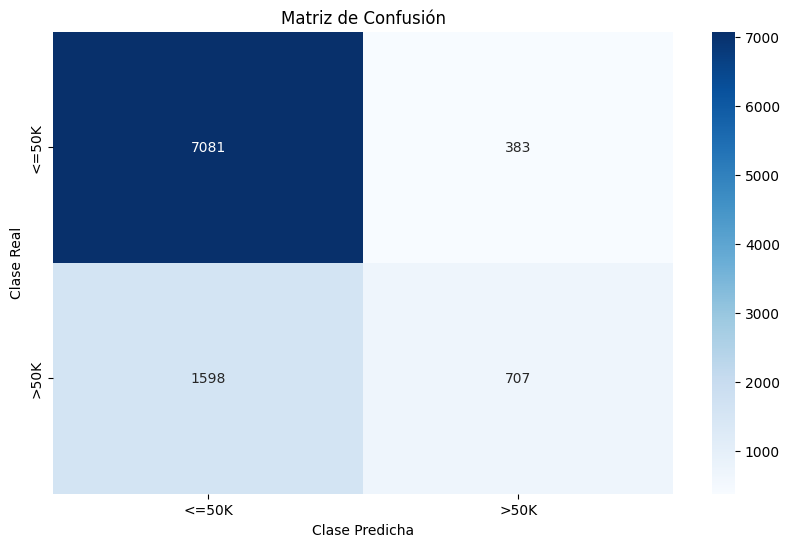

Train Accuracy: 0.7942260442260443
Acurracy0.7972156822602109
              precision    recall  f1-score      support
0              0.815877  0.948687  0.877284  7464.000000
1              0.648624  0.306725  0.416495  2305.000000
accuracy       0.797216  0.797216  0.797216     0.797216
macro avg      0.732251  0.627706  0.646890  9769.000000
weighted avg   0.776414  0.797216  0.768561  9769.000000
       <=50K  >50K
<=50K   7081   383
>50K    1598   707


In [27]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

# Mostrar el informe de clasificación
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Acurracy: "+str(accuracy))
print(report_df)
print(conf_matrix_df)

##  Conclusiones
Para Bayes vemos que tenemos un Acurracy del 0.79% lo cual es bueno para el modelo. Vemos que al igual que los anteriores algoritmos predice de mejor forma la clase de "<=50" con una presición del 0.815877.  

En la matriz de confusión vemos que su diagonal principal es superior frente a la diagonal secundaria lo que indica que el modelo acierta y predice bien. Pero vemos que hay una cantidad considerable de falsos negativos cerca del 1598 de veces

En el equilibrio de aprendizaje vemos que para train y test la diferencia del acurracy es minima esto quiere decir que el modelo está bien ajustado y aprende bien.